# **Project 2**, APS1070 Fall 2022
**Anomaly Detection Algorithm using Gaussian Mixture Model**

**Deadline: Oct 27, 9 PM - 13 points**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the APS1070 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself. Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

Please fill out the following:


*   Name: Yao Yao
*   Student Number: 1004900388

### How to submit **(HTML + IPYNB)**

1. Download your notebook: `File -> Download .ipynb`

2. Click on the Files icon on the far left menu of Colab

3. Select & upload your `.ipynb` file you just downloaded, and then obtain its path (right click) (you might need to hit the Refresh button before your file shows up)


4. execute the following in a Colab cell:
```
%%shell
jupyter nbconvert --to html /PATH/TO/YOUR/NOTEBOOKFILE.ipynb
```

5. An HTML version of your notebook will appear in the files, so you can download it.

6. Submit **both** <font color='red'>`HTML` and `IPYNB`</font>  files on Quercus for grading.



Ref: https://stackoverflow.com/a/64487858 



##**Part 1: Getting started [2 Marks]**

We are going to work with a credit card fraud dataset. This dataset contains 28 key features, which are not 
directly interpretable but contain meaningful information about the dataset.

Load the dataset in CSV file using Pandas. The dataset is called `creditcard.csv`. Print out the first few columns of the dataset.

* How many rows are there?   284807 **[0.1]**
* What features in the dataset are present aside from the 28 main features?  "Time", "Amount", "Class"  **[0.1]**
* Which column contains the targets?  The last column "Class" contains the target**[0.1]**
* What is the meaning of target values? It takes value 1 in case of fraud and 0 otherwise. **[0.1]**

In [ ]:
pip install wget

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=ee4e82f67ddce7c450549521ec731c0340d23ed9697525db49a0bf6efa0626ff
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [ ]:
import wget

wget.download('https://github.com/aps1070-2019/datasets/raw/master/creditcard.tar.gz','creditcard.tar.gz')

'creditcard.tar.gz'

In [ ]:
!tar -zxvf creditcard.tar.gz

creditcard.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
df = pd.read_csv('creditcard.csv')

In [ ]:
### YOUR CODE HERE ###

df.shape[0]

284807

In [ ]:

df #From the table, we could observe the variable "Time", "Amount", "Class" are the features present aside from the main features.

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


It's important to know how many examples we have for each class when we work with a new dataset.

* What is the percentage of entries in the dataset for each class? **[0.1]**

  For Non-fraud, the percentage is 99.83%; For fraud examples, the percentage is 0.17% 
* Is this data considered balanced or unbalanced? Why is this the case? **[0.1]**

  This data is considered unbalanced since the number of examples is not the same for all classes (fraud vs non-fraud) in the dataset. The fraud happens very rare and only have few examples in our dataset, by definition, this is an unbalanced dataset. 

* Why is balance/imbalance important? How might this class ditribution affect a KNN classifier for example, which we explored in Project 1?  **[0.5]**

  Our model may have bias on classification score. It may biased in favor of the majority class since there is not enough data for our model to learn about the minority class examples.
  
  If we applied this class distribution in project1, it may lead to almost all the results are non-fraud example, since the accuracy is affected by the number of nearest neighbour (k) and 99% examples of the class are non-fraud examples.

* What metrics should we use to evaluate a model in such cases  **[0.2]**

  we could use confusion matrix or F1 score to evaluate the model since they only focus on one class.

In [ ]:
### YOUR CODE HERE ###
#count number of examples in each class
classes_count = pd.value_counts(df['Class'])

print("{} Non-fraud examples\n{} Fraud examples".format(classes_count[0], classes_count[1]))

print(classes_count[0]/df.shape[0]*100)
print(classes_count[1]/df.shape[0]*100)

284315 Non-fraud examples
492 Fraud examples
99.82725143693798
0.1727485630620034


Next, split the dataset into a training (65%), validation (20%) and testing set (15%). Set the random state to 40. **[0.2]**

Make sure to separate out the column corresponding to the targets.

In [ ]:
# construct the x df and y df.
X = df.loc[:, df.columns != 'Class' ]
y = df.loc[:, df.columns == 'Class' ]

#split the data
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=40)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=(20/85), random_state=40) 


Now, let's take a look at the difference in distribution for some variables between fraudulent and non-fraudulent transactions:

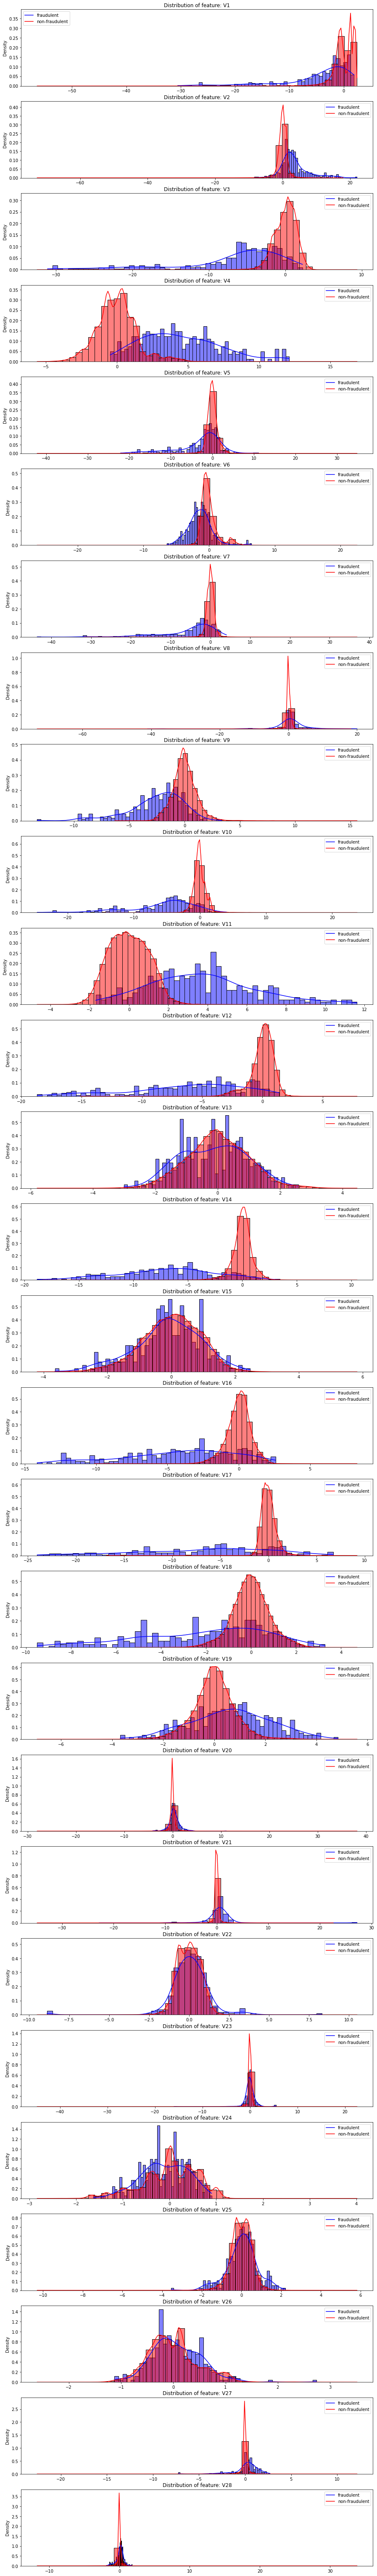

In [ ]:
import matplotlib.gridspec as gridspec
features=[f for f in df.columns if 'V' in f]
nplots=np.size(features)
plt.figure(figsize=(15,4*nplots))
gs = gridspec.GridSpec(nplots,1)
for i, feat in enumerate(features):
    ax = plt.subplot(gs[i])
    sns.histplot(X_train[feat][y_train["Class"]==1], stat="density", kde=True, color="blue", bins=50)
    sns.histplot(X_train[feat][y_train["Class"]==0], stat="density", kde=True, color="red", bins=50)
    ax.legend(['fraudulent', 'non-fraudulent'],loc='best')
    ax.set_xlabel('')
    ax.set_title('Distribution of feature: ' + feat)

Explain how these graphs could provide meaningful information about anomaly detection using a gaussian model. **[0.5]**

In Gaussian model, the outliers usually lie on the tail of the model. If we set a threshold, then we could consider any point beyond that threshold is an outlier(or opposite). In our situation, we have only less than 1% fraud examples. Thus we could consider fraud examples as our outliers. By comparing the difference distributions of main variables. we could identify the outlier of each red curve and compare them with our blue curve. 

## **Part 2: One Gaussian model with Single feature: [2 Marks]**
We'll start by making a prediction using **a single feature of our dataset at a time**. 

Please note that we **only use `V` features** in our model.

**a. Fitting regardless of class:**
  1. Fit a single Gaussian distribution on a single feature of **the full training dataset** (both classes) using ``sklearn.mixture.GaussianMixture`` when ``n_components=1``. 
  2. Compute AUC (Area under the ROC Curve) based on ``sklearn.mixture.GaussianMixture.score_samples`` on both the full training set and validation set (including both classes).  
  3. Repeat the above steps for each of the features and present your findings in a table. **[0.3]**
  4. Find the best 3 features to distinguish fraudulent transactions from non-fraudulent transactions based on the AUC of the validation set. **[0.2]**
  5. Make a prediction based on a model's scores: If the `score_samples` is lower than a threshold, we consider that transaction as a fraud. Find an optimal threshold that maximizes the F1 Score of the validation set for each of those 3 features separately. (Do not check every possible value for threshold, come up with a faster way!) Compute F1 score using `sklearn.metrics.f1_score`. **[0.5]**
  7. Report Precision, Recall and F1 score on both training and validation set in a table using the threshold you found in previous step. 
  6. Report the complexity of your method (Big O notation) for determining the optimal threshold.**[0.3]**

**b. Fitting based on class:**
 1. Pick 3 features that had the best AUC in Part 2a. 
 2. repeat part 2a to compute AUC, F1 score, Precision and Recall when you fit a Gaussian **only on non-fraudulent transactions in the training set** in step 1 (instead of all the transactions).
 3. Compare your results from parts 2a and 2b in a table (for both training and validation set). **[0.2]**
 4. Are these results different or similar? Why?**[0.5]**


In [ ]:
### YOUR CODE HERE ###
from sklearn.mixture import GaussianMixture
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

df_auc = pd.DataFrame(columns=["feature", "train auc", "val auc"])

for i, feat in enumerate(features):

  # select feat as our feature and generate the dataframe
  Xtrain = X_train[[feat]]
  Xval = X_val[[feat]]

  # fit Gaussian Mixed Model and compute auc
  gm = GaussianMixture(n_components=1,random_state = 40).fit(Xtrain)
  c_train = gm.score_samples(Xtrain)
  c_val = gm.score_samples(Xval)

  fpr_t, tpr_t, _ = roc_curve(y_train, -1 * c_train)
  fpr_v, tpr_v, _ = roc_curve(y_val, -1 * c_val)

  # append the result to dataframe
  df_auc = df_auc.append({"feature": feat,"train auc": auc(fpr_t, tpr_t), "val auc": auc(fpr_v, tpr_v)},ignore_index=True)
  

In [ ]:
df_auc.nlargest(3,['val auc']) #the best 3 features are V14, V17 and V10

,feature,train auc,val auc
13,V14,0.948014,0.955065
16,V17,0.928937,0.925698
9,V10,0.910025,0.917279


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
#Find an optimal threshold that maximizes the F1 Score of the validation set for each of those 3 features separately.

df_score = pd.DataFrame(columns=["feature", "threshold", "precision for training", "recall for training", "f1 for training", "precision for val", "recall for val", "f1 for val"])

for i in ["V14", "V17", "V10"]:
  Xtrain = X_train[[i]]
  Xval = X_val[[i]]

  # fit Gaussian Mixed Model 
  gm = GaussianMixture(n_components=1,random_state = 40).fit(Xtrain)
  p = gm.score_samples(Xval)
  ptrain = gm.score_samples(Xtrain)

  best = {}
  for k in [1, 10, 20, 30, 100 , 120, 130]: 
    tr = sorted(p)[k] #We sort the points by probability 
    f1 = f1_score(y_val,p < tr)
    best[tr] = f1

  tr = max(best, key = best.get)
  f1_val = best[tr]
  precision_val = precision_score(y_val, p < tr) 
  recall_val = recall_score(y_val, p < tr) 

  precision_train = precision_score(y_train, ptrain < tr) 
  recall_train = recall_score(y_train, ptrain < tr)
  f1_train = f1_score(y_train,ptrain < tr)

  df_score = df_score.append({"feature": i, "threshold": tr, "precision for training": precision_train, 
                   "recall for training": recall_train, "f1 for training": f1_train, "precision for val": precision_val, "recall for val": recall_val, "f1 for val": f1_val}, ignore_index = True)

df_score

,feature,threshold,precision for training,recall for training,f1 for training,precision for val,recall for val,f1 for val
0,V14,-17.814569,0.575301,0.593168,0.584098,0.610000,0.598039,0.603960
1,V17,-16.028962,0.566265,0.583851,0.574924,0.580000,0.568627,0.574257
2,V10,-27.188319,0.180751,0.239130,0.205882,0.191667,0.225490,0.207207


The complexity of this method is O(logn). The threshold was found inside the for loop.(ie.for k in [ ]). 

The overall loop iterates 7 times. Inside the loop, it would iterate O(logn)times to find our best tr since the list of tr is sorted. Overall, it would iterate the loop O(1) times and inside the loop O(logn) times.

By definition of Big O, let c = 1 and n0 = 0, thus for all n is greater or equal to n0, running time f(n) is less than 1*nlogn. Hence the complexity is O(logn)

In [ ]:
# part 2
# generate the training dataframe of non-fraud examples(ie, class = 0)
result = pd.concat([X_train, y_train], axis=1, join='inner')
train_c0 = result[result["Class"] == 0]
X_train_c0 = train_c0.loc[:, df.columns != 'Class']
y_train_c0 = train_c0.loc[:, df.columns == 'Class']

In [ ]:
df_auc1 = pd.DataFrame(columns=["feature", "train auc", "val auc"])

for i in ["V14", "V17", "V10"]:

  # select feat as our feature and generate the dataframe
  Xtrain = X_train[[i]]
  Xval = X_val[[i]]

  # fit Gaussian Mixed Model and compute auc
  gm = GaussianMixture(n_components=1,random_state = 40).fit(X_train_c0[[i]])
  c_train = gm.score_samples(Xtrain)
  c_val = gm.score_samples(Xval)

  fpr_t, tpr_t, _ = roc_curve(y_train, -1 * c_train)
  fpr_v, tpr_v, _ = roc_curve(y_val, -1 * c_val)

  # append the result to dataframe
  df_auc1 = df_auc1.append({"feature": i,"train auc": auc(fpr_t, tpr_t), "val auc": auc(fpr_v, tpr_v)},ignore_index=True)
  

In [ ]:
df_auc1

,feature,train auc,val auc
0,V14,0.948317,0.954915
1,V17,0.928398,0.925267
2,V10,0.910169,0.917267


In [ ]:

df_auc1 = pd.DataFrame(columns=["feature", "train auc", "val auc"])
df_score1 = pd.DataFrame(columns=["feature", "threshold", "precision for training", "recall for training", "f1 for training", "precision for val", "recall for val", "f1 for val"])

for i in ["V14", "V17", "V10"]:
  Xtrain1 = X_train[[i]]
  Xval1 = X_val[[i]]

  # fit Gaussian Mixed Model and compute auc
  gm1 = GaussianMixture(n_components=1,random_state = 40).fit(X_train_c0[[i]])
  ptrain1 = gm1.score_samples(Xtrain1)
  p1 = gm1.score_samples(Xval1)
  

  fpr_t1, tpr_t1, _ = roc_curve(y_train, -1 * ptrain1)
  fpr_v1, tpr_v1, _ = roc_curve(y_val, -1 *p1)


  # append the result to dataframe
  df_auc1 = df_auc1.append({"feature": i,"train auc": auc(fpr_t1, tpr_t1), "val auc": auc(fpr_v1, tpr_v1)},ignore_index=True)

  best1 = {}
  for k in [1, 10, 20, 30, 100 , 120, 130]: 
    tr1 = sorted(p1)[k] #We sort the points by probability 
    f11 = f1_score(y_val,p1 < tr1)
    best1[tr1] = f11

  tr1 = max(best1, key = best1.get)
  f1_val1 = best1[tr1]
  precision_val1 = precision_score(y_val, p1 < tr1) 
  recall_val1 = recall_score(y_val, p1 < tr1) 

  precision_train1 = precision_score(y_train, ptrain1 < tr1) 
  recall_train1 = recall_score(y_train, ptrain1 < tr1)
  f1_train1 = f1_score(y_train,ptrain1 < tr1)

  df_score1 = df_score1.append({"feature": i, "threshold": tr1, "precision for training": precision_train1, 
                   "recall for training": recall_train1, "f1 for training": f1_train1, "precision for val": precision_val1, "recall for val": recall_val1, "f1 for val": f1_val1}, ignore_index = True)


In [ ]:
df_auc1

,feature,train auc,val auc
0,V14,0.948317,0.954915
1,V17,0.928398,0.925267
2,V10,0.910169,0.917267


In [ ]:
df_score1

,feature,threshold,precision for training,recall for training,f1 for training,precision for val,recall for val,f1 for val
0,V14,-17.222237,0.517588,0.639752,0.572222,0.566667,0.666667,0.612613
1,V17,-19.940435,0.567568,0.586957,0.577099,0.580000,0.568627,0.574257
2,V10,-29.385336,0.180751,0.239130,0.205882,0.191667,0.225490,0.207207


In [ ]:
df_score

,feature,threshold,precision for training,recall for training,f1 for training,precision for val,recall for val,f1 for val
0,V14,-17.814569,0.575301,0.593168,0.584098,0.610000,0.598039,0.603960
1,V17,-16.028962,0.566265,0.583851,0.574924,0.580000,0.568627,0.574257
2,V10,-27.188319,0.180751,0.239130,0.205882,0.191667,0.225490,0.207207


Yes, the result is similar. Since our dataset is unbalanced, 99% of them are non-fraudulent examples. The fraudulent examples are not representitive on the whole dataset. Hence, the difference between those two results is small, which means the results are similar.

## **Part 3: One Gaussian model with multiple features: [2 Marks]**
This part is similar to Part 2, but here we will pick multiple features and set the number of components **visually**.

 1. Pick two features (say, f1 and f2). 
 2. Scatter plot (plt.scatter) those features of the training set on a figure (f1 on the x-axis and f2 on the y-axis). **[0.25]**
 3. On the scatter plot color the training set based on their class (non-fraudulents blue and fraudulents red). **[0.25]**
 4. Based on your plots decide how many Gaussian components (``n_components``) you need to fit the data (focus on valid transactions). **[0.25]**
 5. Fit your Gaussian model on the training set (all samples). 
 6. Compute AUC on both training and validation sets **[0.25]**
 7. Pick 3 new pair of features and repeat steps 2 to 6. **[0.5]**
 8. Pick the set with the highest AUC on the validation set (out of the four sets that you tried.)
 9. Find a threshold to maximize your F1 Score on the validation set.**[0.25]**
 10. Plot two seperate figures (one for the training data and one for the validation data) similar to step 3 and put a circle around outliers based on your threshold (use the code of the similar figure in tutorial) **[0.25]**




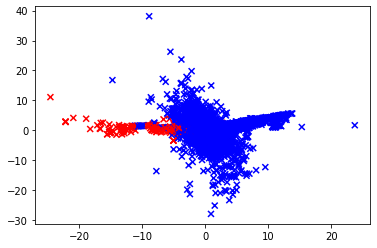

In [ ]:
### YOUR CODE HERE ###
#pick feature V10 and V20
colors = {0:'blue', 1: 'red'}

plt.scatter(result['V10'], result['V20'], c=result['Class'].map(colors), marker='x')
plt.show() # could divide it into 3 clusters, thus let n_components be 3

In [ ]:

# compute auc on both training and validation sets(V10 and V20)
# generate the dataframe with V10 and V20
Xtrain_p3_1 = X_train[["V10", "V20"]]
Xval_p3_1 = X_val[["V10", "V20"]]

# fit Gaussian Mixed Model and compute auc
gm_p3_1 = GaussianMixture(n_components=3,random_state = 40).fit(Xtrain_p3_1)
c_train_p3_1 = gm_p3_1.score_samples(Xtrain_p3_1)
c_val_p3_1 = gm_p3_1.score_samples(Xval_p3_1)

fpr_t_p3_1, tpr_t_p3_1, _ = roc_curve(y_train, -1 * c_train_p3_1)
fpr_v_p3_1, tpr_v_p3_1, _ = roc_curve(y_val, -1 * c_val_p3_1)

# show and store our result
print("train auc", auc(fpr_t_p3_1, tpr_t_p3_1), "val auc", auc(fpr_v_p3_1, tpr_v_p3_1))

train auc 0.9255738613713101 val auc 0.9327533053319816


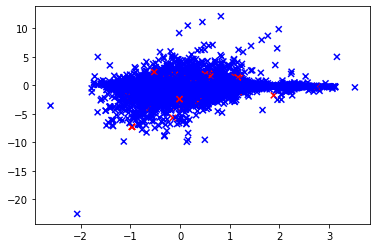

In [ ]:
#pick feature V26 and V27
colors = {0:'blue', 1: 'red'}

plt.scatter(result['V26'], result['V27'], c=result['Class'].map(colors), marker='x')
plt.show() # could divide it into 1 cluster2, thus let n_components be 2

In [ ]:
# compute auc on both training and validation sets(V26 and V27)
# generate the dataframe with V26 and V27
Xtrain_p3_2 = X_train[["V26", "V27"]]
Xval_p3_2 = X_val[["V26", "V27"]]

# fit Gaussian Mixed Model and compute auc
gm_p3_2 = GaussianMixture(n_components=2,random_state = 40).fit(Xtrain_p3_2)
c_train_p3_2 = gm_p3_2.score_samples(Xtrain_p3_2)
c_val_p3_2 = gm_p3_2.score_samples(Xval_p3_2)

fpr_t_p3_2, tpr_t_p3_2, _ = roc_curve(y_train, -1 * c_train_p3_2)
fpr_v_p3_2, tpr_v_p3_2, _ = roc_curve(y_val, -1 * c_val_p3_2)

# show and store our result
print("train auc", auc(fpr_t_p3_2, tpr_t_p3_2), "val auc", auc(fpr_v_p3_2, tpr_v_p3_2))


train auc 0.802565213593363 val auc 0.814158614553806


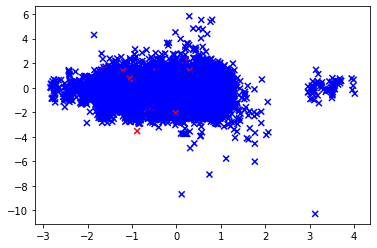

In [ ]:
#pick feature V24 and V25
colors = {0:'blue', 1: 'red'}

plt.scatter(result['V24'], result['V25'], c=result['Class'].map(colors), marker='x')
plt.show() # could divide it into 4 clusters, thus let n_components be 4

In [ ]:
# compute auc on both training and validation sets(V24 and V25)
# generate the dataframe with V24 and V25
Xtrain_p3_3 = X_train[["V24", "V25"]]
Xval_p3_3 = X_val[["V24", "V25"]]

# fit Gaussian Mixed Model and compute auc
gm_p3_3 = GaussianMixture(n_components=4,random_state = 40).fit(Xtrain_p3_3)
c_train_p3_3 = gm_p3_3.score_samples(Xtrain_p3_3)
c_val_p3_3 = gm_p3_3.score_samples(Xval_p3_3)

fpr_t_p3_3, tpr_t_p3_3, _ = roc_curve(y_train, -1 * c_train_p3_3)
fpr_v_p3_3, tpr_v_p3_3, _ = roc_curve(y_val, -1 * c_val_p3_3)

# show and store our result
print("train auc", auc(fpr_t_p3_3, tpr_t_p3_3), "val auc", auc(fpr_v_p3_3, tpr_v_p3_3))

train auc 0.577001042013936 val auc 0.5800345533922328


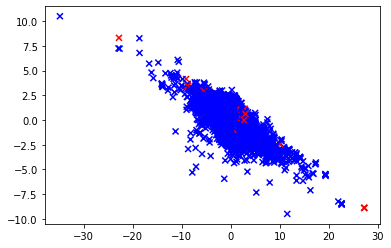

In [ ]:
#pick feature V21 and V22
colors = {0:'blue', 1: 'red'}

plt.scatter(result['V21'], result['V22'], c=result['Class'].map(colors), marker='x')
plt.show() # could divide it into 2 clusters, thus let n_components be 1

In [ ]:
# compute auc on both training and validation sets(V21 and V22)
# generate the dataframe with V21 and V22
Xtrain_p3_4 = X_train[["V21", "V22"]]
Xval_p3_4 = X_val[["V21", "V22"]]

# fit Gaussian Mixed Model and compute auc
gm_p3_4 = GaussianMixture(n_components=1,random_state = 40).fit(Xtrain_p3_4)
c_train_p3_4 = gm_p3_4.score_samples(Xtrain_p3_4)
c_val_p3_4 = gm_p3_4.score_samples(Xval_p3_4)

fpr_t_p3_4, tpr_t_p3_4, _ = roc_curve(y_train, -1 * c_train_p3_4)
fpr_v_p3_4, tpr_v_p3_4, _ = roc_curve(y_val, -1 * c_val_p3_4)

# show and store our result
print("train auc", auc(fpr_t_p3_4, tpr_t_p3_4), "val auc", auc(fpr_v_p3_4, tpr_v_p3_4))

train auc 0.7381305174970652 val auc 0.7734723400440021


By comparing all auc on validation set, we could find the val auc on the set of variable V27 and V28 is the highest.

In [ ]:
best_p3 = {}
for k in [10, 100, 200, 300, 1000 , 1200, 1300, 10000, 30000]: 
  tr_p3 = sorted(c_val_p3_1)[k] #We sort the points by probability 
  f1_p3 = f1_score(y_val,c_val_p3_1 < tr_p3)
  best_p3[tr_p3] = f1_p3

tr_p3 = max(best_p3, key = best_p3.get)
f1_val_p3 = best_p3[tr_p3]
print("threshold: ", tr_p3, " maximized F1 score: ", f1_val_p3)

threshold:  -9.189954317667986  maximized F1 score:  0.17412935323383086


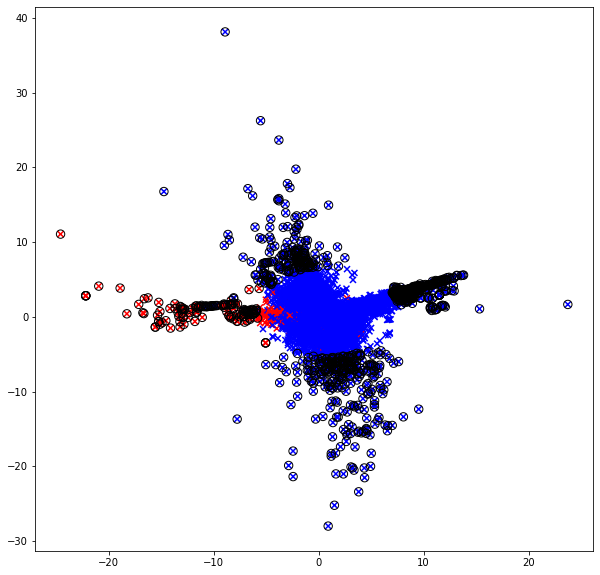

In [ ]:
colors = {0:'blue', 1: 'red'}

plt.figure(figsize=(10,10))
plt.scatter(result['V10'], result['V20'], c=result['Class'].map(colors), marker='x')

outliers = np.nonzero(c_train_p3_1 < tr_p3)[0]
plt.scatter(result.iloc[outliers, 10],result.iloc[outliers,20],marker="o",facecolor="none",edgecolor="black",s=70);

In [ ]:
result_val = pd.concat([X_val, y_val], axis=1, join='inner')

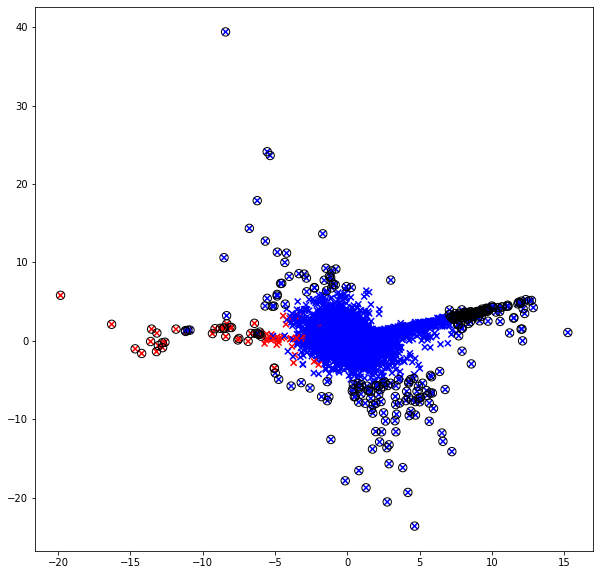

In [ ]:
colors = {0:'blue', 1: 'red'}

plt.figure(figsize=(10,10))
plt.scatter(result_val['V10'], result_val['V20'], c=result_val['Class'].map(colors), marker='x')

outliers_val = np.nonzero(c_val_p3_1 < tr_p3)[0]
plt.scatter(result_val.iloc[outliers_val, 10],result_val.iloc[outliers_val,20],marker="o",facecolor="none",edgecolor="black",s=70);

## **Part 4:  Two Gaussian model with single feature. [3 Marks]**
Now we will use two separate distributions for fraudulent and non-fraudulent transactions.
  1.  Fit a Gaussian distribution ($G_1$) on a feature of **non-fraudulent transactions** using ``sklearn.mixture.GaussianMixture`` when ``n_components=1``. **[0.5]**
  2. Fit another Gaussian distribution ($G_2$) on the same feature but for **fraudulent transactions** using ``sklearn.mixture.GaussianMixture`` when ``n_components=1``. **[0.5]**
  3. Compute the score samples ($S$) for both $G_1$ and $G_2$ on the **validation set** to get $S_1$ and $S_2$, respectively. **[0.5]**
  4. Find an optimal $c$ (a real number) that maximizes validation set F1 Score for a model such that if $S_1 < c \times S_2$, the transaction is classified as a fraud. For example, if $c=1$ we could say that if $S_2$ is greater than $S_1$, ($S_1$<$S_2$) then the transaction is a fraud (the transaction belongs to the $G_2$ distribution which represents fraudulent transactions). For start consider $c$ in $[0,10]$ with steps of 0.1, you can change this window in your experiments if needed. **[0.5]**
  5. Repeat the steps above for all the features. What is the best F1 Score, Precision and Recall that you get for training and validation? Which feature and what c? Show your results in a table. **[0.5]**
  6. Can we report AUC for this model? Why? **[0.5]**

In [ ]:
### YOUR CODE HERE ###
#generate the dataframe of fraud transactions
train_c1 = result[result["Class"] == 1]
X_train_c1 = train_c1.loc[:, df.columns != 'Class']
y_train_c1 = train_c1.loc[:, df.columns == 'Class']

df_c = pd.DataFrame(columns=["feature", "best c", "precision for training", "recall for training", "f1 for training", "precision for val", "recall for val", "f1 for val"])
x = np.linspace(0, 10, 101)

for i, feat in enumerate(features):
  Xtrain = X_train[[feat]]
  Xval = X_val[[feat]]

  #feature feat, non-fraudulent(class == 0)
  g1 = GaussianMixture(n_components=1,random_state = 40).fit(X_train_c0[[feat]])

  #feature feat, fraudlent(class == 1)
  g2 = GaussianMixture(n_components=1,random_state = 40).fit(X_train_c1[[feat]])

  #score samples on validation set.
  s1 = g1.score_samples(Xval)
  s2 = g2.score_samples(Xval)

  # score samples on training set.
  t1 = g1.score_samples(Xtrain)
  t2 = g2.score_samples(Xtrain)

  best_c = {}
 
  for k in range (0,101):
    tr = x[k]*s2
    f1 = f1_score(y_val,s1 < tr)
    best_c[x[k]] = f1

  #find optimal c
  c = max(best_c, key = best_c.get)

  #find optimal tr on val dataset
  tr = c*s2
  f1_val = best_c[c]
  precision_val = precision_score(y_val, s1 < tr) 
  recall_val = recall_score(y_val, s1 < tr)

  #find optimal tr on training dataset
  tr1 = c*t2
  precision_train = precision_score(y_train, t1 < tr1) 
  recall_train = recall_score(y_train, t1 < tr1)
  f1_train = f1_score(y_train,t1 < tr1)

  df_c = df_c.append({"feature": feat, "best c": c, "precision for training": precision_train, 
                   "recall for training": recall_train, "f1 for training": f1_train, "precision for val": precision_val, "recall for val": recall_val, "f1 for val": f1_val}, ignore_index = True)

df_c

,feature,best c,precision for training,recall for training,f1 for training,precision for val,recall for val,f1 for val
0,V1,6.6,0.126506,0.130435,0.128440,0.148148,0.156863,0.152381
1,V2,5.9,0.605263,0.071429,0.127778,0.833333,0.098039,0.175439
2,V3,7.6,0.351759,0.217391,0.268714,0.380282,0.264706,0.312139
3,V4,4.2,0.346041,0.366460,0.355958,0.363636,0.392157,0.377358
4,V5,8.3,0.223404,0.130435,0.164706,0.253968,0.156863,0.193939
5,V6,1.9,0.067164,0.195652,0.100000,0.079470,0.235294,0.118812
6,V7,10.0,0.267399,0.226708,0.245378,0.250000,0.225490,0.237113
7,V8,6.9,0.048387,0.093168,0.063694,0.080645,0.147059,0.104167
8,V9,3.4,0.743802,0.279503,0.406321,0.733333,0.323529,0.448980
9,V10,6.8,0.443089,0.338509,0.383803,0.515625,0.323529,0.397590


No, we cannot report auc for this model since we didn't use the specific threshold for our model. In ROC curve, the recall(TPR) and fall-out(FPR) are computed based on confusion matrix and confusion matrix is baesd on threshold. Besides, in this model we fit 2 gaussian models on non-fraud and fraud classes respectively. In this case, we could not compute tp and fp at the same time. Thus we could not comput the confusion matrix. Hence, we could not report auc for this model.

## **Part 5: Multivariate and Mixture of Gaussians Distribution [3 Marks]**
We now want to build an outlier detection model that performs well in terms of F1 score. To design your model, you can benefit from:

*   No restrictions on the number of features - use as few or as many as you want! (multivariate). 
*   To fit your model, you can take advantage of the Gaussian mixture model where you can set the number of components [help](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html) .
*   You can choose to fit your Gaussians on non-fraudulent transactions or to both classes. 


It is up to you how to design your model. Try at least 10 different models and report the AUC for both training and validation sets (if applicable) and the best F1 score, Precision and Recall (after tuning the threshold) for both training and validation sets for each model. What kind of model works better? How many features are best (and which ones)? How many Gaussians? How many components? Summarize your findings with tables or plots. **[3]**


**HINT !**

You might want to try a two gaussian model, multiple features, single component for valid transaction and multiple components for fraudulent ones! Why does it make sense to have multiple components for the fraudulent transactions?

In [ ]:
### YOUR CODE HERE ###

#define helper functions on finding auc, f1 score, precision and recall

# find auc on both training dataset and validation dataset

def find_auc(Xtrain, Xval, gm):
  c_train = gm.score_samples(Xtrain)
  c_val = gm.score_samples(Xval)

  fpr_t, tpr_t, _ = roc_curve(y_train, -1 * c_train)
  fpr_v, tpr_v, _ = roc_curve(y_val, -1 * c_val)
  train_auc = auc(fpr_t, tpr_t)
  val_auc = auc(fpr_v, tpr_v)

  return(train_auc, val_auc)

# find f1 score, precision and recall on both training dataset and validation dataset with 1 gaussian model
def find_score_g1(Xtrain, Xval, gm):
  c_train = gm.score_samples(Xtrain)
  c_val = gm.score_samples(Xval)

  best={}
  for k in [10, 100, 200, 300, 1000 , 1200, 1300, 10000, 30000]: 
    tr = sorted(p1)[k] #We sort the points by probability 
    f1 = f1_score(y_val,c_val < tr)
    best[tr] = f1

  tr = max(best, key = best.get)
  f1_val = best[tr]
  precision_val = precision_score(y_val, c_val < tr) 
  recall_val = recall_score(y_val, c_val < tr) 

  precision_train = precision_score(y_train, c_train < tr) 
  recall_train = recall_score(y_train, c_train < tr)
  f1_train = f1_score(y_train,c_train < tr)

  return(f1_train, precision_train, recall_train, f1_val, precision_val, recall_val)


# find f1 score, precision and recall on both training dataset and validation dataset with 2 gaussian model
def find_score_g2(Xtrain, Xval, g1, g2):
  x = np.linspace(0, 10, 101)

  #score samples on validation set.
  s1 = g1.score_samples(Xval)
  s2 = g2.score_samples(Xval)

  # score samples on training set.
  t1 = g1.score_samples(Xtrain)
  t2 = g2.score_samples(Xtrain)

  best_c = {}

  for k in range (0,101):
    tr = x[k]*s2
    f1 = f1_score(y_val,s1 < tr)
    best_c[x[k]] = f1

  #find optimal c
  c = max(best_c, key = best_c.get)

  #find optimal tr on val dataset
  tr = c*s2
  f1_val = best_c[c]
  precision_val = precision_score(y_val, s1 < tr) 
  recall_val = recall_score(y_val, s1 < tr)

  #find optimal tr on training dataset
  tr1 = c*t2
  precision_train = precision_score(y_train, t1 < tr1) 
  recall_train = recall_score(y_train, t1 < tr1)
  f1_train = f1_score(y_train,t1 < tr1)

  return(f1_train, precision_train, recall_train, f1_val, precision_val, recall_val)

In [ ]:
# model 1: V14 on both classes with n_component = 2
df_o = pd.DataFrame(columns=["auc on training","auc on val", "f1 on training", "precision on training", "recall on training", "f1 on val", "precision on val", "recall on val"])


Xtrain1 = X_train[["V14"]]
Xval1 = X_val[["V14"]]
gm1 = GaussianMixture(n_components=2,random_state = 40).fit(Xtrain1)

train_auc1, val_auc1 = find_auc(Xtrain1, Xval1, gm1)
f1_train1, precision_train1, recall_train1, f1_val1, precision_val1, recall_val1 = find_score_g1(Xtrain1, Xval1, gm1)
df_o = df_o.append({"auc on training": train_auc1,"auc on val": val_auc1, 
                  "f1 on training": f1_train1, "precision on training": precision_train1, "recall on training": recall_train1, 
                  "f1 on val": f1_val1, "precision on val":precision_val1, "recall on val":recall_val1}, ignore_index = True)

# model 2: V17 on both classes with n_component2
Xtrain2 = X_train[["V17"]]
Xval2 = X_val[["V17"]]
gm2 = GaussianMixture(n_components=2,random_state = 40).fit(Xtrain2)

train_auc2, val_auc2 = find_auc(Xtrain2, Xval2, gm2)
f1_train2, precision_train2, recall_train2, f1_val2, precision_val2, recall_val2 = find_score_g1(Xtrain2, Xval2, gm2)
df_o = df_o.append({"auc on training": train_auc2,"auc on val": val_auc2, 
                  "f1 on training": f1_train2, "precision on training": precision_train2, "recall on training": recall_train2, 
                  "f1 on val": f1_val2, "precision on val":precision_val2, "recall on val":recall_val2}, ignore_index = True)

# model 3: V10 on both classes with n_component2
Xtrain3 = X_train[["V10"]]
Xval3 = X_val[["V10"]]
gm3 = GaussianMixture(n_components=2,random_state = 40).fit(Xtrain3)

train_auc3, val_auc3 = find_auc(Xtrain3, Xval3, gm3)
f1_train3, precision_train3, recall_train3, f1_val3, precision_val3, recall_val3 = find_score_g1(Xtrain3, Xval3, gm3)
df_o = df_o.append({"auc on training": train_auc3,"auc on val": val_auc3, 
                  "f1 on training": f1_train3, "precision on training": precision_train3, "recall on training": recall_train3, 
                  "f1 on val": f1_val3, "precision on val":precision_val3, "recall on val":recall_val3}, ignore_index = True)


In [ ]:
# model4: 
#two gaussian model, V1 V2, single component for valid transaction and multiple components for fraudulent ones
Xtrain4 = X_train[["V1", "V2"]]
Xval4 = X_val[["V1", "V2"]]

#non-fraudulent(class == 0)
g4_1 = GaussianMixture(n_components=1,random_state = 40).fit(X_train_c0[["V1", "V2"]])

#fraudlent(class == 1)
g4_2 = GaussianMixture(n_components=2,random_state = 40).fit(X_train_c1[["V1", "V2"]])

f1_train4, precision_train4, recall_train4, f1_val4, precision_val4, recall_val4 = find_score_g2(Xtrain4, Xval4, g4_1, g4_2)
df_o = df_o.append({"f1 on training": f1_train4, "precision on training": precision_train4, "recall on training": recall_train4, 
                  "f1 on val": f1_val4, "precision on val":precision_val4, "recall on val":recall_val4}, ignore_index = True)



# model 5: two gaussian model, V11 V12, single component for valid transaction and multiple components for fraudulent ones
Xtrain5 = X_train[["V11", "V12"]]
Xval5 = X_val[["V11", "V12"]]

#non-fraudulent(class == 0)
g5_1 = GaussianMixture(n_components=1,random_state = 40).fit(X_train_c0[["V11", "V12"]])

#fraudlent(class == 1)
g5_2 = GaussianMixture(n_components=2,random_state = 40).fit(X_train_c1[["V11", "V12"]])

f1_train5, precision_train5, recall_train5, f1_val5, precision_val5, recall_val5 = find_score_g2(Xtrain5, Xval5, g5_1, g5_2)
df_o = df_o.append({"f1 on training": f1_train5, "precision on training": precision_train5, "recall on training": recall_train5, 
                  "f1 on val": f1_val5, "precision on val":precision_val5, "recall on val":recall_val5}, ignore_index = True)



# model 6: two gaussian model, V10 V20, single component for valid transaction and multiple components for fraudulent ones
Xtrain6 = X_train[["V10", "V20"]]
Xval6 = X_val[["V10", "V20"]]

#non-fraudulent(class == 0)
g6_1 = GaussianMixture(n_components=1,random_state = 40).fit(X_train_c0[["V10", "V20"]])

#fraudlent(class == 1)
g6_2 = GaussianMixture(n_components=2,random_state = 40).fit(X_train_c1[["V10", "V20"]])

f1_train6, precision_train6, recall_train6, f1_val6, precision_val6, recall_val6 = find_score_g2(Xtrain6, Xval6, g6_1, g6_2)
df_o = df_o.append({"f1 on training": f1_train6, "precision on training": precision_train6, "recall on training": recall_train6, 
                  "f1 on val": f1_val6, "precision on val":precision_val6, "recall on val":recall_val6}, ignore_index = True)



# model 7: two gaussian model, V15 V21, single component for valid transaction and multiple components for fraudulent ones
Xtrain7 = X_train[["V15", "V21"]]
Xval7 = X_val[["V15", "V21"]]

#non-fraudulent(class == 0)
g7_1 = GaussianMixture(n_components=1,random_state = 40).fit(X_train_c0[["V15", "V21"]])

#fraudlent(class == 1)
g7_2 = GaussianMixture(n_components=2,random_state = 40).fit(X_train_c1[["V15", "V21"]])

f1_train7, precision_train7, recall_train7, f1_val7, precision_val7, recall_val7 = find_score_g2(Xtrain7, Xval7, g7_1, g7_2)
df_o = df_o.append({"f1 on training": f1_train7, "precision on training": precision_train7, "recall on training": recall_train7, 
                  "f1 on val": f1_val7, "precision on val":precision_val7, "recall on val":recall_val7}, ignore_index = True)



# model 8: two gaussian model, V17 V24, single component for valid transaction and multiple components for fraudulent ones
Xtrain8 = X_train[["V17", "V24"]]
Xval8 = X_val[["V17", "V24"]]

#non-fraudulent(class == 0)
g8_1 = GaussianMixture(n_components=1,random_state = 40).fit(X_train_c0[["V17", "V24"]])

#fraudlent(class == 1)
g8_2 = GaussianMixture(n_components=2,random_state = 40).fit(X_train_c1[["V17", "V24"]])

f1_train8, precision_train8, recall_train8, f1_val8, precision_val8, recall_val8 = find_score_g2(Xtrain8, Xval8, g8_1, g8_2)
df_o = df_o.append({"f1 on training": f1_train8, "precision on training": precision_train8, "recall on training": recall_train8, 
                  "f1 on val": f1_val8, "precision on val":precision_val8, "recall on val":recall_val8}, ignore_index = True)

In [ ]:
# model 9: two gaussian model, V18 V25, single component for valid transaction and multiple components for fraudulent ones
Xtrain9 = X_train[["V18", "V25"]]
Xval9 = X_val[["V18", "V25"]]

#non-fraudulent(class == 0)
g9_1 = GaussianMixture(n_components=1,random_state = 40).fit(X_train_c0[["V18", "V25"]])

#fraudlent(class == 1)
g9_2 = GaussianMixture(n_components=2,random_state = 40).fit(X_train_c1[["V18", "V25"]])

f1_train9, precision_train9, recall_train9, f1_val9, precision_val9, recall_val9 = find_score_g2(Xtrain9, Xval9, g9_1, g9_2)
df_o = df_o.append({"f1 on training": f1_train9, "precision on training": precision_train9, "recall on training": recall_train9, 
                  "f1 on val": f1_val9, "precision on val":precision_val9, "recall on val":recall_val9}, ignore_index = True)



# model 10: two gaussian model, V19 V26, single component for valid transaction and multiple components for fraudulent ones
Xtrain10 = X_train[["V19", "V26"]]
Xval10 = X_val[["V19", "V26"]]

#non-fraudulent(class == 0)
g10_1 = GaussianMixture(n_components=1,random_state = 40).fit(X_train_c0[["V19", "V26"]])

#fraudlent(class == 1)
g10_2 = GaussianMixture(n_components=2,random_state = 40).fit(X_train_c1[["V19", "V26"]])

f1_train10, precision_train10, recall_train10, f1_val10, precision_val10, recall_val10 = find_score_g2(Xtrain10, Xval10, g10_1, g10_2)
df_o = df_o.append({"f1 on training": f1_train10, "precision on training": precision_train10, "recall on training": recall_train10, 
                  "f1 on val": f1_val10, "precision on val":precision_val10, "recall on val":recall_val10}, ignore_index = True)

df_o

,auc on training,auc on val,f1 on training,precision on training,recall on training,f1 on val,precision on val,recall on val
0,0.949351,0.952992,0.526104,0.744318,0.406832,0.525641,0.759259,0.401961
1,0.931366,0.927761,0.460850,0.824000,0.319876,0.463768,0.888889,0.313725
2,0.910904,0.918809,0.233696,0.934783,0.133540,0.192982,0.916667,0.107843
3,NaN,NaN,0.172297,0.188889,0.158385,0.229508,0.259259,0.205882
4,NaN,NaN,0.720412,0.804598,0.652174,0.736264,0.837500,0.656863
5,NaN,NaN,0.440000,0.474820,0.409938,0.462366,0.511905,0.421569
6,NaN,NaN,0.041088,0.022655,0.220497,0.065700,0.036442,0.333333
7,NaN,NaN,0.654991,0.751004,0.580745,0.647399,0.788732,0.549020
8,NaN,NaN,0.413793,0.596491,0.316770,0.450331,0.693878,0.333333
9,NaN,NaN,0.036866,0.071429,0.024845,0.069444,0.119048,0.049020



From the generated dataframe, we could observe the model 5 has the highest f1 score on validation dataset(0.736). Model 5 is a 2 gaussian model, with feature V11 and V12, single component(n=1) for valid transaction and multiple components(n=2) for fraudulent examples.

## **Part 6: Evaluating performance on test set: [1 Mark]**
**Which model worked better?** Pick your best model among all models and apply it to your test set. Report the F1 Score, Precision and Recall on the test set. **[1]**


model 5 has the highest f1 score on validation dataset, hence choose model 5 as our model

In [ ]:
### YOUR CODE HERE ###
# model 5 has the highest f1 score on validation dataset, hence choose model 5 as our model
# on test set.

Xtrain5 = X_train[["V11", "V12"]]
Xval5 = X_val[["V11", "V12"]]
Xtest5 = X_test[["V11", "V12"]]

def find_score_f(Xtrain, Xval, Xtest, g1, g2):
  x = np.linspace(0, 10, 101)

  #score samples on validation set.
  s1 = g1.score_samples(Xval)
  s2 = g2.score_samples(Xval)

  # score samples on testing set.
  t1 = g1.score_samples(Xtest)
  t2 = g2.score_samples(Xtest)

  best_c = {}

  for k in range (0,101):
    tr = x[k]*s2
    f1 = f1_score(y_val,s1 < tr)
    best_c[x[k]] = f1

  #find optimal c
  c = max(best_c, key = best_c.get)

  #scores on test dataset
  tr = c*t2
  precision_test = precision_score(y_test, t1 < tr) 
  recall_test = recall_score(y_test, t1 < tr)
  f1_test = f1_score(y_test,t1 < tr)


  return(f1_test, precision_test, recall_test)


f1_test, precision_test, recall_test = find_score_f(Xtrain5, Xval5, Xtest5, g5_1, g5_2)

print("f1 score on test set: ", f1_test, ";precision on test set: ", precision_test, ";recall on test set: ", recall_test)

f1 score on test set:  0.78125 ;precision on test set:  0.8333333333333334 ;recall on test set:  0.7352941176470589
